# Plotting and Data Visualization

A picture is worth a thousand words. While exploring an unknow data set the visualisation of data is a powerful way to more understanding and an important part of data science.

The Python ecosystem includes several low and high level plotting/visualization libraries. The most feature-complete and popular one is [**matplotlib**](https://matplotlib.org). Among the alternatives are [**bokeh**](https://bokeh.pydata.org/en/latest/) and [**plotly**](https://plot.ly/python/), focusing on interactive visualizations.

Libraries like [**seaborn**](http://seaborn.pydata.org) are built on matplotlib and provide a high-level interface for visual data analysis. The [**pandas**](http://pandas.pydata.org/) library also provides a more high-level plotting interface that uses matplotlib.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn

To show the plots inline in the notebook we set:


In [2]:
%matplotlib inline

Here we configure some settings for the following plots:

In [3]:
seaborn.set_style("ticks")
plt.rcParams['figure.figsize'] = (16.0, 6.0)
plt.rcParams['axes.grid'] = True

#### Load the dataset
The data set is of roughly 5000 different white wine samples ([Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)). The different columns are chemical and physical characteristics. In addition a quality score is given.

In [4]:
WINE_COLOR = 'red'
df = pd.read_csv(f'../.assets/data/winequality/{WINE_COLOR}.csv.zip', sep=';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


_Note:_  [Documentation of the data set and additional information](https://files.point-8.de/trainings/data-science-101/wine-quality/INFO.md)

## Types of Plots

### Bar Chart

As a first example we will check how the wine quality is distributed. To do so we use a **bar chart**, because we have discrete values to denote the wine quality.

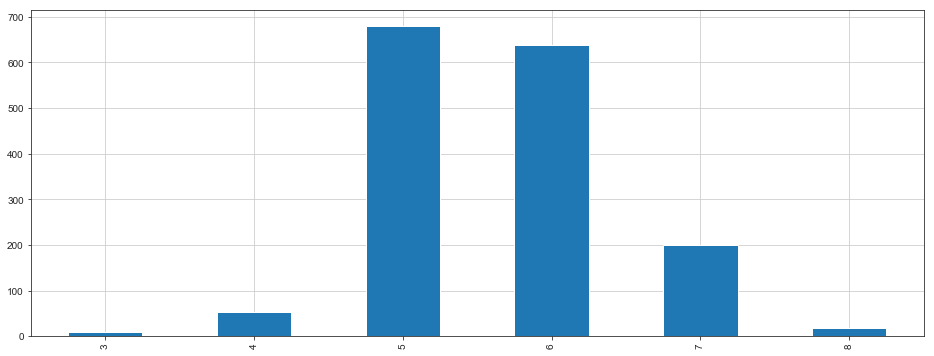

In [6]:
df["quality"].value_counts().sort_index().plot(kind="bar")  

## Box plot

A nice option to visualize the statistical distribution of a data set are [**box plots**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html). The _box_ itself includes by definition the central 50% of the data. Thereby, the box includes all data point from the 0.25-quantile (Q1) to the 0.75-quantile (Q3). Its length is called _interquantile range_ (IQR). In blue we see the **median** (Q2, 0.5-quantile), the **mean** ist the dotted line. The length of two _whiskers_ is 1.5 times the extent of the box: median $\pm$ 1.5xIQR. The whisker allways ends on the last data point laying in the range of a whisker. All data lying outside of the whisker edges can be classifyied as outliers (marked by `x`).

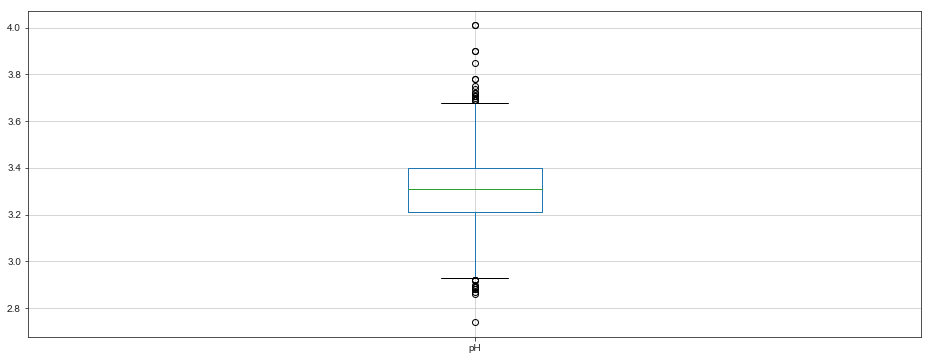

In [7]:
df["pH"].plot(kind="box")

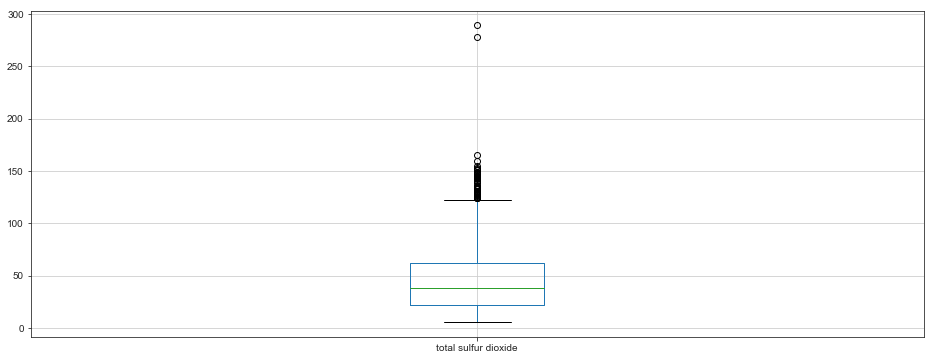

In [8]:
df["total sulfur dioxide"].plot(kind="box")

Note that until now we have only called methods of `pandas` - they provide a high-level interface to the most commonly used plots. In many cases, we can get the visualizations we want by passing the right parameters to these high level methods. 

However, if we want more customized plots, we might have to go down one level and call `matplotlib` directly. This is what we see in the example below: Showing the distribution of all variables visualised as box plots and combined in a single plot.

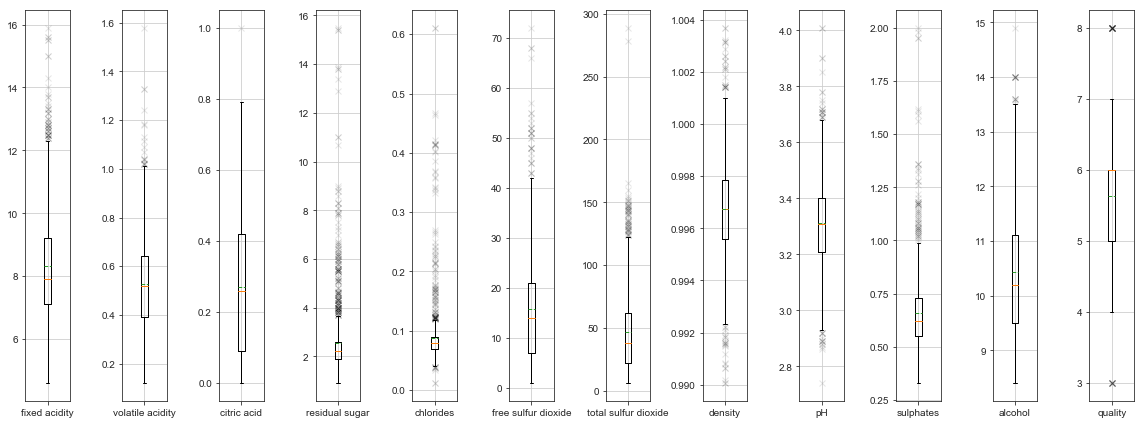

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=df.columns.size)
for idx, c in enumerate(df.columns):
    axes[idx].boxplot(df[c], 
                      showmeans=True, 
                      meanline=True, 
                      whis=1.5, 
                      labels=[c], 
                      flierprops = {'color': 'silver', 'alpha': 0.1, 'marker': 'x'});
plt.tight_layout()    

## Histogram

Another possibility to visualize the distribution of data is the [**histogram**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). In this case we have a continuous range of pH values, and want to visualize how the wines are distributed over this range. Each data point is added to it's associated value range (**bin**). The height of each bar corresponds to the number of entries per bin.

Text(0.5, 1.0, 'pH values')

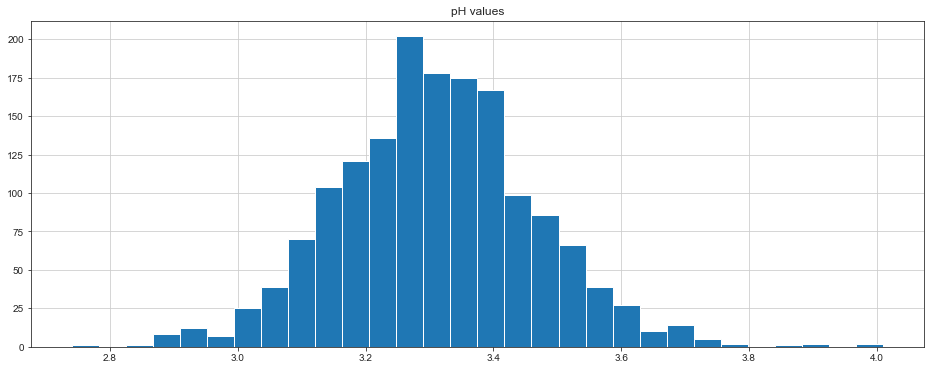

In [10]:
df["pH"].hist(bins=30)
plt.title("pH values")

## Violin plot

Another interesting option for showing distributions is the [**violin plot**](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.violinplot.html). It can be thought of as a combination of box plot and histogram. 

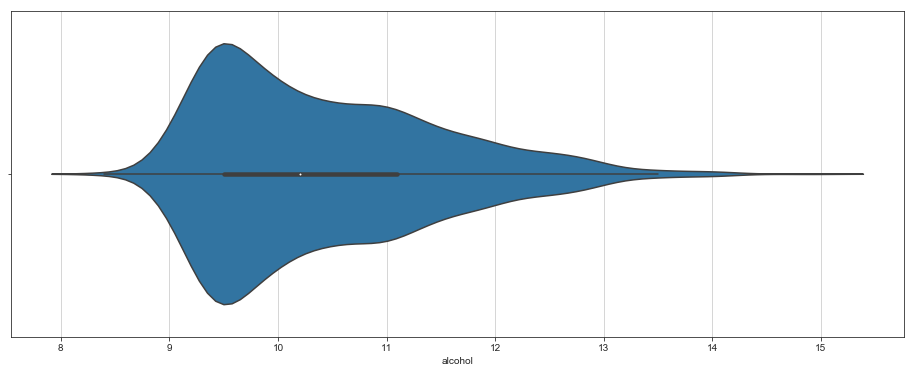

In [11]:
seaborn.violinplot(
    x=df["alcohol"],
    title="distribution of alcohol content",
)

## Scatter plot

To put the distributions of two variables in relation, we can use [**scatter plots**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). Here we compare how the residual sugar concentration behaves in comparison to the volumentric alcohol concentration.

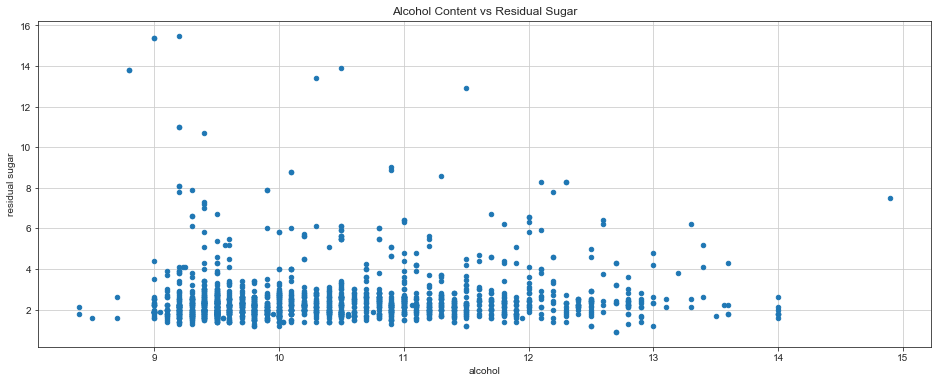

In [12]:
df.plot(
    kind="scatter", 
    x="alcohol", 
    y="residual sugar",
    title="Alcohol Content vs Residual Sugar"
)

## 2d-histogram (_Heatmap_)

Alternatively, we can visualize the point density using a [**2-dimensional histogram**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) (also called **heatmap**). The value range is again divided into discrete bins. The number of entries per bin is visualized using a [color map](https://matplotlib.org/users/colormaps.html) (_cmap_). The name heatmap indicates, that (depending on the color scheme) areas with more data are visualised as "hotter".

In [13]:
hist, x_axis, y_axis = np.histogram2d(
    x=df["residual sugar"], 
    y=df["alcohol"],
    bins=10
)

In [14]:
hist_df = pd.DataFrame(
    hist, 
    index=np.round(x_axis[1:], 2), 
    columns=np.round(y_axis[1:], 2),
)
hist_df

,9.05,9.7,10.35,11.0,11.65,12.3,12.95,13.6,14.25,14.9
2.36,26.0,346.0,217.0,147.0,135.0,57.0,50.0,10.0,6.0,0.0
3.82,6.0,134.0,85.0,84.0,77.0,42.0,29.0,5.0,1.0,0.0
5.28,1.0,17.0,8.0,8.0,13.0,11.0,4.0,5.0,0.0,0.0
6.74,0.0,7.0,8.0,15.0,5.0,7.0,2.0,1.0,0.0,0.0
8.20,0.0,7.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9.66,0.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0
11.12,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14.04,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15.50,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


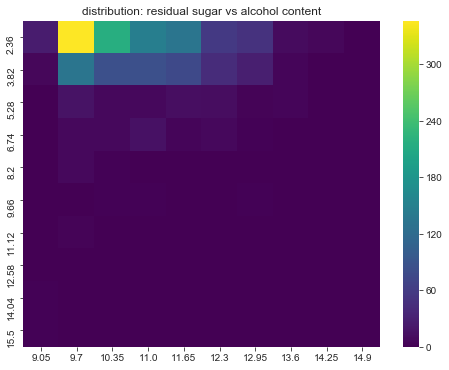

In [15]:
plt.figure(figsize=(8,6))
plt.title("distribution: residual sugar vs alcohol content")
seaborn.heatmap(
    data=hist_df,
    cmap="viridis",
)


## Interactive Plots

In some data analysis applications, the ability to explore the plots interactively is helpful - think about interactive dashboards. `plotly` is a library that is similar in its functionality to `matplolib`, only that it outputs interactive plots.

In [16]:
import plotly.graph_objs
from plotly.offline import iplot

### Bar Chart

This example is analogous to the bar chart example above. With `plotly` however, we get interactivity:

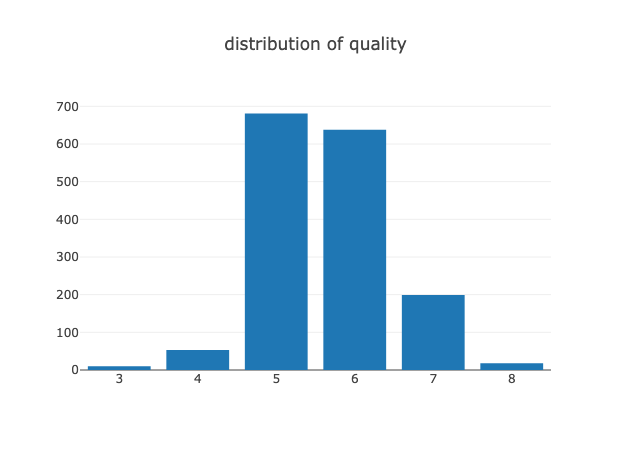

In [17]:
histogram = df["quality"].value_counts().sort_index()

barchart = plotly.graph_objs.Bar(
    x=histogram.index,
    y=histogram
)

layout = plotly.graph_objs.Layout(title="distribution of quality", autosize=True)
figure = plotly.graph_objs.Figure(data=[barchart], layout=layout)

iplot(figure_or_data=figure)

### Box Plot

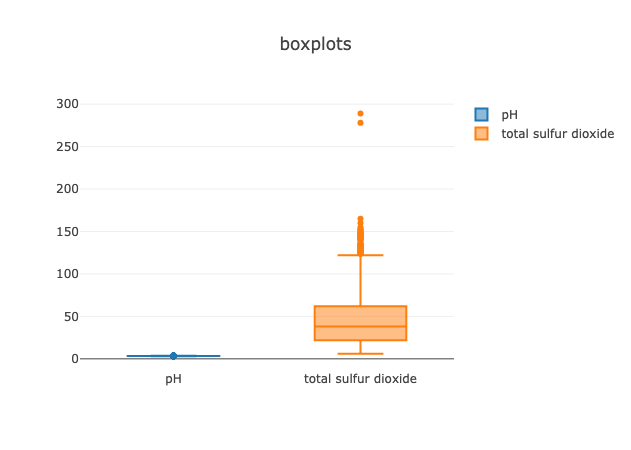

In [18]:
layout = plotly.graph_objs.Layout(
    title="boxplots", 
    autosize=True
)

figure = plotly.graph_objs.Figure(
    data=[
        plotly.graph_objs.Box(
            y=df["pH"],
            name="pH"
        ),
        plotly.graph_objs.Box(
            y=df["total sulfur dioxide"],
            name="total sulfur dioxide"
        ),        
    ], 
    layout=layout
)

iplot(figure_or_data=figure)

## Scatter Plot

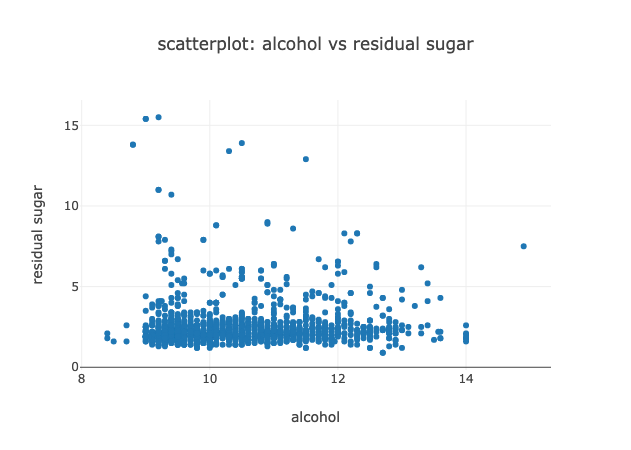

In [19]:
layout = plotly.graph_objs.Layout(
    title="scatterplot: alcohol vs residual sugar", 
    autosize=True,
    xaxis={"title": "alcohol"},
    yaxis={"title": "residual sugar"}
)

figure = plotly.graph_objs.Figure(
    data=[
        plotly.graph_objs.Scatter(
            x=df["alcohol"],
            y=df["residual sugar"],
            mode="markers"
        )        
    ], 
    layout=layout
)

iplot(figure_or_data=figure)

---
_This notebook is licensed under a [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/). Copyright © 2018 [Point 8 GmbH](https://point-8.de)_